In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
# Install monai package for comparison if not already installed
#!pip install monai

In [3]:
# import monai metrics
import monai.metrics as monai_metrics
dice_metric = monai_metrics.DiceMetric(include_background=True)
surface_distance_95_metric = monai_metrics.HausdorffDistanceMetric(include_background=True, percentile=95)
surface_distance_avg_metric = monai_metrics.SurfaceDistanceMetric(include_background=True)

# import the custom metrics implementation
import monai_metrics as custom_metrics
dice_metric_custom = custom_metrics.DiceMetric()
surface_distance_95_metric_custom = custom_metrics.HausdorffDistanceMetric()
surface_distance_avg_metric_custom = custom_metrics.SurfaceDistanceMetric()

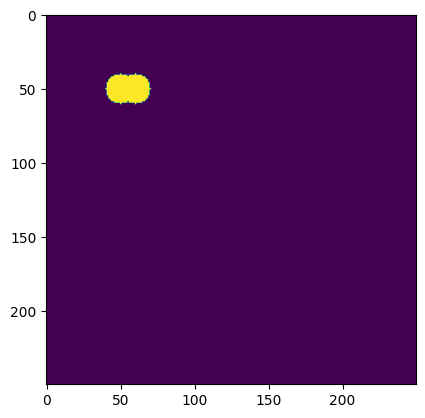

In [4]:
# create a random prediction and target for testing

image_size = (250,250)

m1 = cv2.circle(np.zeros(image_size), (50,50), 10, 255, -1) > 0
m1 = torch.tensor(m1).unsqueeze(0).unsqueeze(0)
m1_numpy = m1.cpu().numpy()

m2 = cv2.circle(np.zeros(image_size), (60,50), 10, 255, -1) > 0
m2 = torch.tensor(m2).unsqueeze(0).unsqueeze(0)
m2_numpy = m2.cpu().numpy()

plt.imshow(m1[0,0] | m2[0,0])

In [ ]:
# compare the custom and monai metrics implementations
# they should return the same result up to floating point precision

dice_custom = dice_metric_custom(m1_numpy, m2_numpy)
dice_monai = dice_metric(m1, m2)
print("Dice custom:", dice_custom)
print("Dice monai: ", dice_monai.cpu().numpy())
print()

surface_distance_95_custom = surface_distance_95_metric_custom(m1_numpy, m2_numpy)
surface_distance_95_monai = surface_distance_95_metric(m1, m2)
print("Surface distance 95 custom:", surface_distance_95_custom)
print("Surface distance 95 monai: ", surface_distance_95_monai.cpu().numpy())
print()

surface_distance_avg_custom = surface_distance_avg_metric_custom(m1_numpy, m2_numpy)
surface_distance_avg_monai = surface_distance_avg_metric(m1, m2)
print("Surface distance avg custom:", surface_distance_avg_custom)
print("Surface distance avg monai: ", surface_distance_avg_monai.cpu().numpy())

Dice custom: [[0.40063092]]
Dice monai:  [[0.40063092]]

Surface distance 95 custom: [[9.577339]]
Surface distance 95 monai:  [[9.577339]]

Surface distance avg custom: [[5.6690626]]
Surface distance avg monai:  [[5.6690626]]


In [6]:
# assert that the custom and monai implementations are the same
assert np.isclose(dice_custom, dice_monai)
assert np.isclose(surface_distance_95_custom, surface_distance_95_monai)
assert np.isclose(surface_distance_avg_custom, surface_distance_avg_monai)

In [7]:
# compare the runtime of the custom and monai metrics implementations

In [8]:
%%timeit
# monai implementation
dice_monai = dice_metric(m1, m2)

507 μs ± 126 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [9]:
%%timeit
# monai implementation
surface_distance_95_monai = surface_distance_95_metric(m1, m2)

3.33 ms ± 137 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
# monai implementation
surface_distance_avg_monai = surface_distance_avg_metric(m1, m2)

2.8 ms ± 16.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
%%timeit
# custom implementation
dice_custom = dice_metric_custom(m1_numpy, m2_numpy)

108 μs ± 103 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%%timeit
# custom implementation
surface_distance_95_custom = surface_distance_95_metric_custom(m1_numpy, m2_numpy)

347 μs ± 816 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [13]:
%%timeit
# custom implementation
surface_distance_avg_custom = surface_distance_avg_metric_custom(m1_numpy, m2_numpy)

285 μs ± 1.67 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
